In [1]:
## import the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

##### import data 

In [2]:
file_path = 'C:/Data_set/'

In [3]:
customer = pd.read_csv(file_path + 'Customer.csv')

In [4]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [6]:
pro_cat_info = pd.read_csv(file_path + 'prod_cat_info.csv')

In [7]:
pro_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [8]:
pro_cat_info.head(23)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [9]:
transaction = pd.read_csv(file_path + 'Transactions.csv')

In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [11]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### Q1

In [12]:
pro_cat_info.rename(columns={'prod_sub_cat_code' : 'prod_subcat_code'}, inplace=True)
pro_cat_info.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [13]:
## merging transaction and prod-info table
tr_pd = pd.merge(left=transaction, right= pro_cat_info, how = 'inner', 
                 on=['prod_subcat_code', 'prod_cat_code'] )

In [14]:
tr_pd

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens


In [15]:
## merging tr_pd and customers
customer_final= pd.merge(left = customer, right=tr_pd, how= 'inner', 
                         left_on='customer_Id', right_on='cust_id')

In [16]:
## final_output for Q1
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
2,268408,02-01-1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
3,268408,02-01-1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
4,268408,02-01-1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23050,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic
23051,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens


In [17]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   cust_id           23053 non-null  int64  
 6   tran_date         23053 non-null  object 
 7   prod_subcat_code  23053 non-null  int64  
 8   prod_cat_code     23053 non-null  int64  
 9   Qty               23053 non-null  int64  
 10  Rate              23053 non-null  int64  
 11  Tax               23053 non-null  float64
 12  total_amt         23053 non-null  float64
 13  Store_type        23053 non-null  object 
 14  prod_cat          23053 non-null  object 
 15  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(7), object(6)
memor

In [18]:
customer_final.isna().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [19]:
customer_final.duplicated().sum()

13

In [20]:
customer_final.drop_duplicates(inplace=True)

In [21]:
customer_final['DOB'] = pd.to_datetime(customer_final.DOB, format= '%d-%m-%Y')

In [22]:
customer_final['tran_date'] = pd.to_datetime(customer_final.tran_date)

In [23]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,63314547725,268408,2012-04-26,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women
1,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
2,268408,1970-01-02,M,4.0,12644501524,268408,2012-08-14,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
3,268408,1970-01-02,M,4.0,56844530655,268408,2012-10-14,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
4,268408,1970-01-02,M,4.0,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23050,274308,1992-12-29,F,5.0,58160544337,274308,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic
23051,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens


In [24]:
customer_final.select_dtypes(['int64', 'float64']).describe().round(2)

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23040.00,23032.00,2.304000e+04,23040.00,23040.00,23040.00,23040.00,23040.00,23040.00,23040.00
mean,271021.88,5.48,5.006955e+10,271021.88,6.15,3.76,2.44,637.09,248.68,2109.87
std,2431.57,2.86,2.898062e+10,2431.57,3.73,1.68,2.26,621.73,187.19,2505.61
min,266783.00,1.00,3.268991e+06,266783.00,1.00,1.00,-5.00,-1499.00,7.35,-8270.92
25%,268935.00,3.00,2.493315e+10,268935.00,3.00,2.00,1.00,312.00,98.28,762.45
50%,270980.50,5.00,5.009188e+10,270980.50,5.00,4.00,3.00,710.00,199.08,1756.95
75%,273114.25,8.00,7.532632e+10,273114.25,10.00,5.00,4.00,1109.00,365.77,3570.26
max,275265.00,10.00,9.998755e+10,275265.00,12.00,6.00,5.00,1500.00,787.50,8287.50


In [25]:
def continuous_var_summary( x ):
    return pd.Series( [ x.min(), x.median(), x.quantile(0.25), x.quantile(0.75), x.max() ], 
                    index = [ 'min', 'median', 'Q1', 'Q3', 'max']) 

#### Q2a

In [26]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [27]:
customer_final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

### Q2b

In [28]:
## Top 10
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,63314547725,268408,2012-04-26,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women
1,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
2,268408,1970-01-02,M,4.0,12644501524,268408,2012-08-14,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
3,268408,1970-01-02,M,4.0,56844530655,268408,2012-10-14,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
4,268408,1970-01-02,M,4.0,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
5,268408,1970-01-02,M,4.0,19516063887,268408,2012-07-09,10,3,4,650,273.000,2873.000,e-Shop,Electronics,Audio and video
6,268408,1970-01-02,M,4.0,28810141075,268408,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
7,268408,1970-01-02,M,4.0,16688203936,268408,2011-12-07,10,6,5,777,407.925,4292.925,Flagship store,Home and kitchen,Kitchen
8,268408,1970-01-02,M,4.0,64633435931,268408,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids
9,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [29]:
### Bottom 10
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,270476,1992-12-25,F,3.0,85475160771,270476,2011-09-08,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,Computers
23044,270476,1992-12-25,F,3.0,78034405353,270476,2013-08-13,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,Bath
23045,270476,1992-12-25,F,3.0,19725194268,270476,2012-02-21,4,4,4,618,259.560,2731.560,e-Shop,Bags,Women
23046,270476,1992-12-25,F,3.0,3359888057,270476,2013-03-16,10,3,4,361,151.620,1595.620,MBR,Electronics,Audio and video
23047,270476,1992-12-25,F,3.0,22883386455,270476,2012-05-22,4,2,4,898,377.160,3969.160,Flagship store,Footwear,Kids
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23050,274308,1992-12-29,F,5.0,58160544337,274308,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic
23051,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens
23052,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens


## Q2c

In [30]:
continuous_summary = customer_final[['Qty','Rate','Tax','total_amt']].apply(continuous_var_summary)

In [31]:
continuous_summary

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.3500,-8270.925
median,3.0,710.0,199.0800,1756.950
Q1,1.0,312.0,98.2800,762.450
Q3,4.0,1109.0,365.7675,3570.255
max,5.0,1500.0,787.5000,8287.500


## Q2d

In [32]:
customer_final.select_dtypes('object').describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


## Q3

In [33]:
cus_conti_var = customer_final[['Qty','Rate','Tax','total_amt']]

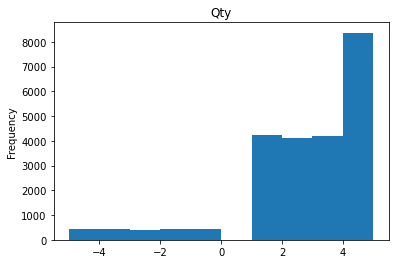

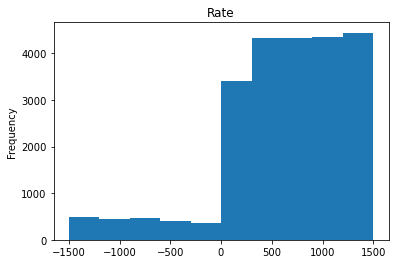

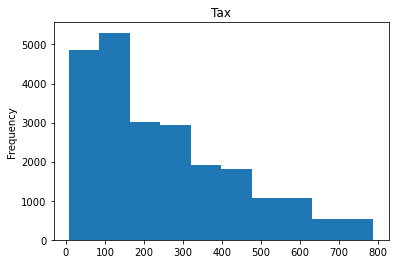

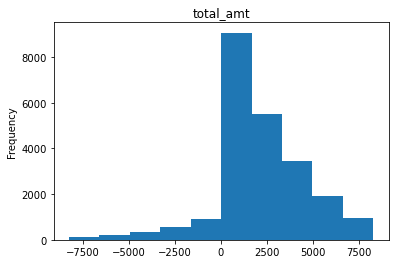

In [34]:
for var in cus_conti_var.columns:
    cus_conti_var[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [35]:
cus_cat_var = customer_final.select_dtypes('object')

C:\Users\Mantu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


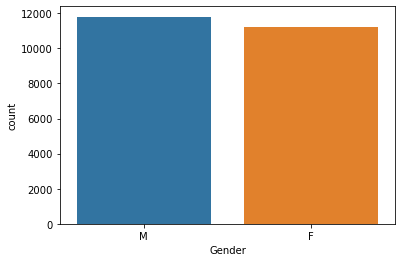

In [36]:
sns.countplot(cus_cat_var['Gender'])
plt.show()

C:\Users\Mantu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


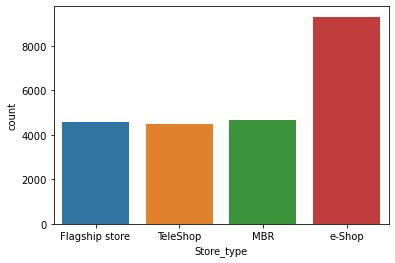

In [37]:
sns.countplot(cus_cat_var.Store_type)
plt.show()

C:\Users\Mantu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


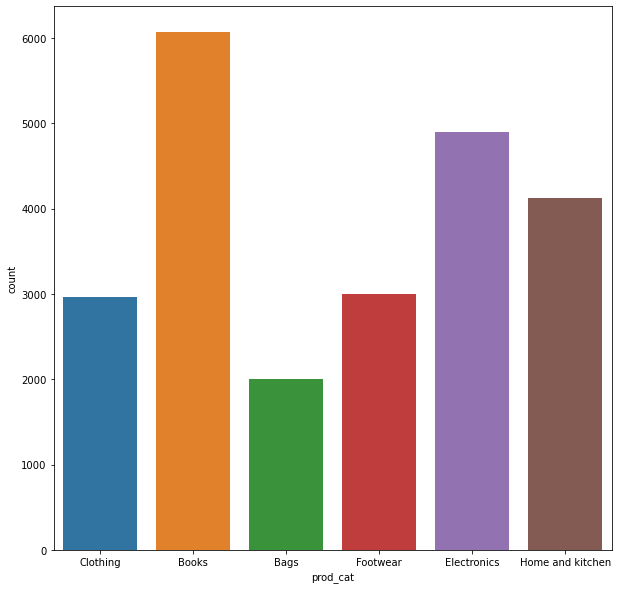

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(cus_cat_var.prod_cat)
plt.show()

C:\Users\Mantu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


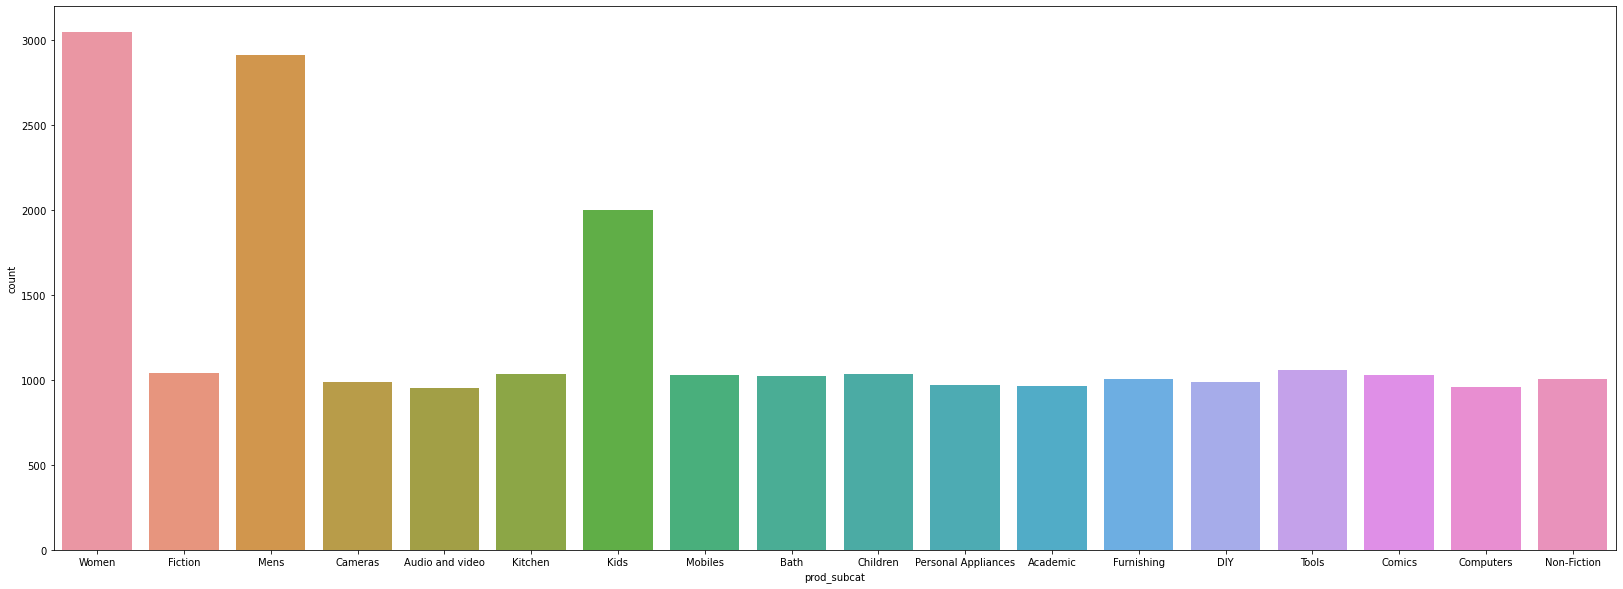

In [39]:
plt.figure(figsize=(28,10))
sns.countplot(cus_cat_var.prod_subcat)
plt.show()

## Q4a

In [40]:
customer_final.tran_date.max().year - customer_final.tran_date.min().year
print('Total years of availabe trans_data: ', 
      customer_final.tran_date.max().year - customer_final.tran_date.min().year )

Total years of availabe trans_data:  3


In [41]:
customer_final.tran_date.max()
customer_final.tran_date.min()
print('Time period of availabe transaction data:', customer_final.tran_date.min() ,'to', customer_final.tran_date.max())

Time period of availabe transaction data: 2011-01-02 00:00:00 to 2014-12-02 00:00:00


### Q4b

In [42]:
np.count_nonzero(customer_final.total_amt<0)
print('count of Total transactions where transactions in negtive: ',np.count_nonzero(
    customer_final.total_amt<0) )

count of Total transactions where transactions in negtive:  2164


### Q5

In [43]:
male_sales = customer_final[customer_final.Gender=='M']

In [44]:
MALE_SALES= male_sales.groupby(['Gender', 'prod_cat'])['Qty'].sum().reset_index()
MALE_SALES

,Gender,prod_cat,Qty
0,M,Bags,2346
1,M,Books,7587
2,M,Clothing,3748
3,M,Electronics,6486
4,M,Footwear,3561
5,M,Home and kitchen,5051


In [45]:
print('most popular product of male customers:' , 
      MALE_SALES[MALE_SALES.Qty==MALE_SALES.Qty.max()])

most popular product of male customers:   Gender prod_cat   Qty
1      M    Books  7587


In [46]:
female_sales = customer_final[customer_final.Gender=='F']

In [47]:
female_sales = female_sales.groupby(['Gender', 'prod_cat'])['Qty'].sum().reset_index()

In [48]:
female_sales

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898


In [49]:
print('most popular product of female customers:' , 
      female_sales[female_sales.Qty==female_sales.Qty.max()])

most popular product of female customers:   Gender prod_cat   Qty
1      F    Books  7080


## Q6

In [50]:
total_cust_city_wise = pd.DataFrame(customer_final.groupby('city_code')['customer_Id'].count())

In [51]:
total_cust_city_wise['percentage_of_cust'] = (total_cust_city_wise.customer_Id / 
                                              customer_final.customer_Id.count())*100

In [52]:
total_cust_city_wise.rename(columns={'customer_Id': 'count_of_customer'}, inplace=True)

In [53]:
total_cust_city_wise[total_cust_city_wise.count_of_customer == 
                     total_cust_city_wise.count_of_customer.max()].round(2)

,count_of_customer,percentage_of_cust
city_code,,
4.0,2422,10.51


### Q7

In [54]:
max_store_type_sells = pd.DataFrame(customer_final.groupby(
    ['Store_type'])[['Rate','Qty']].agg({'Rate':np.sum, 'Qty': 'count'}))
max_store_type_sells[max_store_type_sells.Rate>=max_store_type_sells.Rate.max()]

,Rate,Qty
Store_type,,
e-Shop,5945770,9304


### Q8

In [55]:
falgship = pd.DataFrame(customer_final.groupby(['Store_type','prod_cat'])
                        ['total_amt'].sum()).reset_index()
flagship = falgship[falgship.Store_type=='Flagship store']

In [56]:
flagship[flagship.prod_cat.isin(['Clothing', 'Electronics'])].reset_index(drop=True)

,Store_type,prod_cat,total_amt
0,Flagship store,Clothing,1194423.23
1,Flagship store,Electronics,2215136.04


### Q9

In [57]:
male_sales[male_sales.prod_cat=='Electronics']

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
4,268408,1970-01-02,M,4.0,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
5,268408,1970-01-02,M,4.0,19516063887,268408,2012-07-09,10,3,4,650,273.000,2873.000,e-Shop,Electronics,Audio and video
54,266997,1970-01-23,M,9.0,9052147021,266997,2011-04-23,8,3,5,961,504.525,5309.525,e-Shop,Electronics,Personal Appliances
59,274593,1970-01-26,M,10.0,21405692017,274593,2012-11-19,8,3,4,603,253.260,2665.260,TeleShop,Electronics,Personal Appliances
63,274593,1970-01-26,M,10.0,54037981023,274593,2012-07-05,10,3,5,1276,669.900,7049.900,e-Shop,Electronics,Audio and video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,274861,1992-12-08,M,10.0,82885924626,274861,2012-10-18,10,3,5,668,350.700,3690.700,Flagship store,Electronics,Audio and video
23003,274861,1992-12-08,M,10.0,65988711103,274861,2012-12-10,10,3,1,1369,143.745,1512.745,e-Shop,Electronics,Audio and video
23007,271385,1992-12-08,M,1.0,76550965196,271385,2012-03-06,8,3,4,316,132.720,1396.720,MBR,Electronics,Personal Appliances
23031,271772,1992-12-17,M,2.0,7709432812,271772,2013-02-23,9,3,2,1148,241.080,2537.080,e-Shop,Electronics,Cameras


In [58]:
male_sales_elctronics = pd.DataFrame(male_sales.groupby('prod_cat')['total_amt'].sum()).reset_index()

In [59]:
male_sales_elctronics=male_sales_elctronics[male_sales_elctronics.prod_cat=='Electronics'].reset_index(drop = True)
male_sales_elctronics

,prod_cat,total_amt
0,Electronics,5711351.62


### Q10

In [60]:
cust_df_no_neg = customer_final[customer_final.total_amt>0]

In [61]:
cust_nunique=pd.DataFrame(cust_df_no_neg.groupby('customer_Id')['transaction_id'].nunique()).reset_index()
cust_nunique=(cust_nunique[cust_nunique.transaction_id>10]).reset_index(drop=True)

In [62]:
print('Total number of unique customers :', cust_nunique.customer_Id.count())

Total number of unique customers : 6


### Q11

### Q11A

In [63]:
customer_final_withage = customer_final.copy()

In [64]:
customer_final_withage['age']=pd.Timestamp.now().year - customer_final_withage.DOB.dt.year

In [65]:
customer_twentyfive_thirtyfive = customer_final_withage[(customer_final_withage.age >= 25
                                                        ) & (customer_final_withage.age <= 35)]

In [66]:
Electronics = pd.DataFrame(customer_twentyfive_thirtyfive.groupby
                           ('prod_cat')['total_amt'].sum()).reset_index()

In [67]:
books = pd.DataFrame(customer_twentyfive_thirtyfive.groupby
                     ('prod_cat')['total_amt'].sum()).reset_index()

In [68]:
Electronics=Electronics[Electronics.prod_cat=='Electronics'].reset_index(drop=True)

In [69]:
books=books[books.prod_cat=='Books'].reset_index(drop=True)

In [70]:
print("Total amount spent on electronics and book:", (books.total_amt)+(Electronics.total_amt))

Total amount spent on electronics and book: 0    6058458.64
Name: total_amt, dtype: float64


### Q11B

In [71]:
total_sale_date_range = pd.DataFrame(customer_twentyfive_thirtyfive.groupby(
    'tran_date')['total_amt'].sum()).reset_index()

In [72]:
total_sale_date_range = total_sale_date_range[(total_sale_date_range.tran_date >= '2014-01-01')
                     &(total_sale_date_range.tran_date <= '2014-03-01')]

In [73]:
print("Total sale b/w 1st jan 2014 to 1st march 2014 :" , total_sale_date_range.total_amt.sum().round(3))

Total sale b/w 1st jan 2014 to 1st march 2014 : 428230.595
